## Overview of the problem
In this project you will have to put yourself in the shoes of a loan issuer and manage credit risk by using the past data and deciding whom to give the loan to in the future. The text files contain complete loan data for all loans issued by XYZ Corp. through 2007-2015. The data contains the indicator of default, payment information, credit history, etc.


# Importing Package

In [1]:
import pandas as pd
import os as os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py
import plotly.graph_objs as go
%matplotlib inline
plt.style.use('fivethirtyeight')

## loading the Project directory

In [2]:
os.chdir(r"E:\imaticus project\capstone project\Python Project")

In [3]:
os.listdir()

['Bank Lending.csv',
 'DataDictionary-14-10-17.xlsx',
 'Imarticus Problem Statement-14-10-17.docx',
 'Report.html',
 'XYZCorp_LendingData.txt',
 '~$articus Problem Statement-14-10-17.docx']

## reading the data from the directory

In [4]:
%time df = pd.read_table('XYZCorp_LendingData.txt',parse_dates=['issue_d'],low_memory=False)

Wall time: 11.2 s


In [5]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [6]:
df.shape

(855969, 73)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   id                           855969 non-null  int64         
 1   member_id                    855969 non-null  int64         
 2   loan_amnt                    855969 non-null  float64       
 3   funded_amnt                  855969 non-null  float64       
 4   funded_amnt_inv              855969 non-null  float64       
 5   term                         855969 non-null  object        
 6   int_rate                     855969 non-null  float64       
 7   installment                  855969 non-null  float64       
 8   grade                        855969 non-null  object        
 9   sub_grade                    855969 non-null  object        
 10  emp_title                    806526 non-null  object        
 11  emp_length                

In [8]:
df.describe(include="all")

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
count,8.559690e+05,8.559690e+05,855969.000000,855969.000000,855969.000000,855969,855969.000000,855969.000000,855969,855969,...,11609.000000,13288.000000,13288.000000,13288.000000,13288.000000,7.886560e+05,13288.000000,13288.000000,13288.000000,855969.000000
unique,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,7,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,36 months,NaN,NaN,B,B3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,600221,NaN,NaN,247998,54958,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.224073e+07,3.476269e+07,14745.571335,14732.378305,14700.061226,NaN,13.192320,436.238072,NaN,NaN,...,71.486993,1.354305,2.945515,5840.443332,61.024526,3.216357e+04,0.947772,1.524232,1.841963,0.054286
std,2.271969e+07,2.399418e+07,8425.340005,8419.471653,8425.805478,NaN,4.368365,243.726876,NaN,NaN,...,23.015293,1.483710,2.595313,5108.500262,20.018117,3.769964e+04,1.441667,2.697601,2.975049,0.226581
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,NaN,5.320000,15.690000,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000,0.000000
25%,9.067986e+06,1.079273e+07,8000.000000,8000.000000,8000.000000,NaN,9.990000,260.550000,NaN,NaN,...,58.500000,0.000000,1.000000,2405.000000,47.900000,1.400000e+04,0.000000,0.000000,0.000000,0.000000


# Missing value Handling

In [9]:
df.isnull().sum().sort_values(ascending=False)

dti_joint                    855529
verification_status_joint    855527
annual_inc_joint             855527
il_util                      844360
mths_since_rcnt_il           843035
                              ...  
pub_rec                           0
open_acc                          0
inq_last_6mths                    0
earliest_cr_line                  0
id                                0
Length: 73, dtype: int64

###  visualising  The missing value using the bar Graph

In [10]:
def missing_value_visualization(df):
    fig0=plt.figure(figsize=(20,4))
    plt.title('List of columns and there NA values count')
    return(df.isnull().sum().plot(kind='bar'))


    


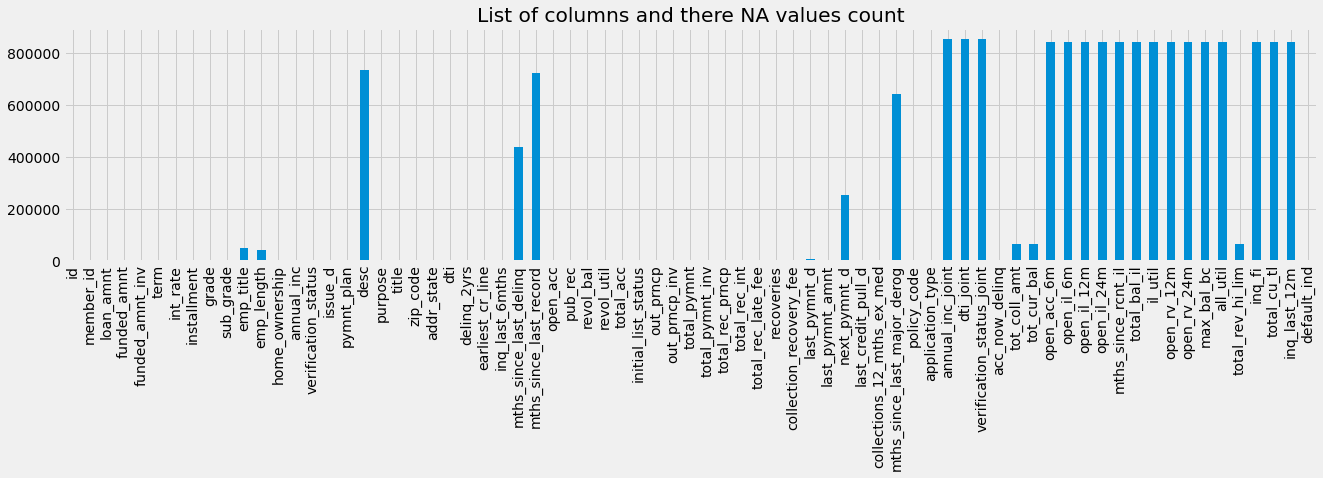

In [11]:
 missing_value_visualization(df)

## Function to calculate the missing value percentage

In [12]:
def missing_data_percent(df):
    total_value = df.isnull().sum().sort_values(ascending=False)
    percentage = ((df.isnull().sum()/df.isnull().count()).sort_values(ascending=False))*100
    missing_data = pd.concat([total_value,percentage],axis=1,keys=['Total','Missing_percent'])
    return(missing_data.head(30))


In [13]:
missing_data_percent(df)

,Total,Missing_percent
dti_joint,855529,99.948596
verification_status_joint,855527,99.948363
annual_inc_joint,855527,99.948363
il_util,844360,98.643759
mths_since_rcnt_il,843035,98.488964
total_bal_il,842681,98.447607
inq_last_12m,842681,98.447607
open_acc_6m,842681,98.447607
open_il_6m,842681,98.447607
open_il_24m,842681,98.447607


In [14]:
df.shape

(855969, 73)

In [15]:
new_df = df.copy()

In [16]:
new_df.shape

(855969, 73)

In [17]:
# Removing the top feature with most missing value
new_df=new_df.drop(['dti_joint','verification_status_joint','annual_inc_joint','il_util','mths_since_rcnt_il',
'total_bal_il','inq_last_12m','open_acc_6m','open_il_6m','open_il_24m','open_il_12m',
'open_rv_12m','open_rv_24m','max_bal_bc','all_util','inq_fi','total_cu_tl','desc','mths_since_last_record',
'mths_since_last_major_derog','mths_since_last_delinq','next_pymnt_d','tot_cur_bal',
'tot_coll_amt','total_rev_hi_lim','emp_title'],axis=1)

In [18]:
new_df.shape

(855969, 47)

In [19]:
df.shape

(855969, 73)

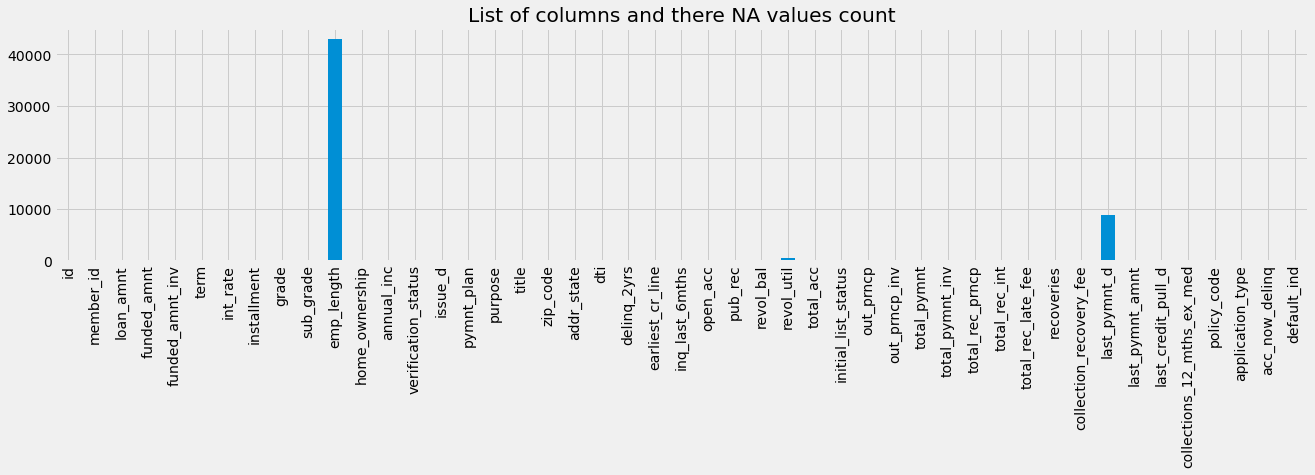

In [20]:
 missing_value_visualization(new_df)

In [21]:
missing_data_percent(new_df)

,Total,Missing_percent
emp_length,43061,5.030673
last_pymnt_d,8862,1.035318
revol_util,446,0.052105
collections_12_mths_ex_med,56,0.006542
last_credit_pull_d,50,0.005841
title,33,0.003855
default_ind,0,0.000000
zip_code,0,0.000000
purpose,0,0.000000
pymnt_plan,0,0.000000


In [22]:
new_df.dtypes

id                                     int64
member_id                              int64
loan_amnt                            float64
funded_amnt                          float64
funded_amnt_inv                      float64
term                                  object
int_rate                             float64
installment                          float64
grade                                 object
sub_grade                             object
emp_length                            object
home_ownership                        object
annual_inc                           float64
verification_status                   object
issue_d                       datetime64[ns]
pymnt_plan                            object
purpose                               object
title                                 object
zip_code                              object
addr_state                            object
dti                                  float64
delinq_2yrs                          float64
earliest_c

In [23]:
new_df['revol_util'].dtypes

dtype('float64')

In [24]:
new_df['revol_util'].fillna(new_df['revol_util'].mean(),inplace=True)

In [25]:
missing_data_percent(new_df)

,Total,Missing_percent
emp_length,43061,5.030673
last_pymnt_d,8862,1.035318
collections_12_mths_ex_med,56,0.006542
last_credit_pull_d,50,0.005841
title,33,0.003855
default_ind,0,0.000000
addr_state,0,0.000000
zip_code,0,0.000000
purpose,0,0.000000
pymnt_plan,0,0.000000


In [26]:
new_df['last_credit_pull_d'] = pd.to_datetime(new_df['last_credit_pull_d'])
new_df['Month'] = new_df['last_credit_pull_d'].apply(lambda x: x.month)
new_df['Year'] = new_df['last_credit_pull_d'].apply(lambda x:x.year)
new_df = new_df.drop(['last_credit_pull_d'],axis=1)

In [27]:
new_df.shape

(855969, 48)

In [28]:
missing_data_percent(new_df)

,Total,Missing_percent
emp_length,43061,5.030673
last_pymnt_d,8862,1.035318
collections_12_mths_ex_med,56,0.006542
Year,50,0.005841
Month,50,0.005841
title,33,0.003855
funded_amnt_inv,0,0.000000
funded_amnt,0,0.000000
dti,0,0.000000
addr_state,0,0.000000


In [29]:
new_df['title'].value_counts()

Debt consolidation                  398089
Credit card refinancing             159228
Home improvement                     38633
Other                                30522
Debt Consolidation                   15469
                                     ...  
Golf For Life                            1
Get out free card                        1
credit card and car loan                 1
Debt -- Consolidate and Conquer!         1
MySituation                              1
Name: title, Length: 60991, dtype: int64

In [30]:
new_df['title'].mode()

0    Debt consolidation
dtype: object

In [31]:
new_df['title'].fillna('Debt consolidation',inplace=True)

In [32]:
missing_data_percent(new_df)

,Total,Missing_percent
emp_length,43061,5.030673
last_pymnt_d,8862,1.035318
collections_12_mths_ex_med,56,0.006542
Year,50,0.005841
Month,50,0.005841
funded_amnt_inv,0,0.000000
funded_amnt,0,0.000000
dti,0,0.000000
addr_state,0,0.000000
zip_code,0,0.000000


In [33]:
new_df['Month'].value_counts()

1.0     709200
12.0     25079
11.0     16813
10.0     15672
9.0      14742
7.0      13016
8.0      12624
6.0      10758
5.0       9775
4.0       9657
3.0       9644
2.0       8939
Name: Month, dtype: int64

In [34]:
new_df['Month'].fillna(new_df.mode()['Month'][0],inplace=True)
new_df['Year'].fillna(new_df.mode()['Year'][0],inplace=True)

In [35]:
missing_data_percent(new_df)

,Total,Missing_percent
emp_length,43061,5.030673
last_pymnt_d,8862,1.035318
collections_12_mths_ex_med,56,0.006542
Year,0,0.000000
home_ownership,0,0.000000
dti,0,0.000000
addr_state,0,0.000000
zip_code,0,0.000000
title,0,0.000000
purpose,0,0.000000


In [36]:
new_df.shape

(855969, 48)

In [37]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 48 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   id                          855969 non-null  int64         
 1   member_id                   855969 non-null  int64         
 2   loan_amnt                   855969 non-null  float64       
 3   funded_amnt                 855969 non-null  float64       
 4   funded_amnt_inv             855969 non-null  float64       
 5   term                        855969 non-null  object        
 6   int_rate                    855969 non-null  float64       
 7   installment                 855969 non-null  float64       
 8   grade                       855969 non-null  object        
 9   sub_grade                   855969 non-null  object        
 10  emp_length                  812908 non-null  object        
 11  home_ownership              855969 non-

In [38]:
#removing/droping the unwanted features 
new_df = new_df.drop(['id'],axis=1)
new_df = new_df.drop(['member_id'],axis=1)
new_df = new_df.drop(['earliest_cr_line'],axis=1)
new_df = new_df.drop(['zip_code'],axis=1)
new_df = new_df.drop(['last_pymnt_d'],axis=1)
new_df = new_df.drop(['policy_code'],axis=1)

In [39]:
new_df.shape

(855969, 42)

In [40]:
new_df.head(n=20)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,default_ind,Month,Year
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,...,0.00,0.00,0.0000,171.62,0.0,INDIVIDUAL,0.0,0,1.0,2016.0
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,0.00,117.08,1.1100,119.66,0.0,INDIVIDUAL,0.0,1,9.0,2013.0
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,0.00,0.00,0.0000,649.91,0.0,INDIVIDUAL,0.0,0,1.0,2016.0
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,16.97,0.00,0.0000,357.48,0.0,INDIVIDUAL,0.0,0,1.0,2015.0
4,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,...,0.00,0.00,0.0000,67.79,0.0,INDIVIDUAL,0.0,0,1.0,2016.0
5,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,...,0.00,0.00,0.0000,161.03,0.0,INDIVIDUAL,0.0,0,9.0,2015.0
6,7000.0,7000.0,7000.0,60 months,15.96,170.08,C,C5,8 years,RENT,...,0.00,0.00,0.0000,170.08,0.0,INDIVIDUAL,0.0,0,1.0,2016.0
7,3000.0,3000.0,3000.0,36 months,18.64,109.43,E,E1,9 years,RENT,...,0.00,0.00,0.0000,111.34,0.0,INDIVIDUAL,0.0,0,12.0,2014.0
8,5600.0,5600.0,5600.0,60 months,21.28,152.39,F,F2,4 years,OWN,...,0.00,189.06,2.0900,152.39,0.0,INDIVIDUAL,0.0,1,8.0,2012.0
9,5375.0,5375.0,5350.0,60 months,12.69,121.45,B,B5,< 1 year,RENT,...,0.00,269.29,2.5200,121.45,0.0,INDIVIDUAL,0.0,1,3.0,2013.0


In [41]:
new_df.describe(include=np.object)

,term,grade,sub_grade,emp_length,home_ownership,verification_status,pymnt_plan,purpose,title,addr_state,initial_list_status,application_type
count,855969,855969,855969,812908,855969,855969,855969,855969,855969,855969,855969,855969
unique,2,7,35,11,6,3,2,14,60991,51,2,2
top,36 months,B,B3,10+ years,MORTGAGE,Source Verified,n,debt_consolidation,Debt consolidation,CA,f,INDIVIDUAL
freq,600221,247998,54958,282090,429106,318178,855964,505392,398122,125172,442555,855527


In [42]:
new_df.dtypes

loan_amnt                            float64
funded_amnt                          float64
funded_amnt_inv                      float64
term                                  object
int_rate                             float64
installment                          float64
grade                                 object
sub_grade                             object
emp_length                            object
home_ownership                        object
annual_inc                           float64
verification_status                   object
issue_d                       datetime64[ns]
pymnt_plan                            object
purpose                               object
title                                 object
addr_state                            object
dti                                  float64
delinq_2yrs                          float64
inq_last_6mths                       float64
open_acc                             float64
pub_rec                              float64
revol_bal 

In [43]:
#replace the categorial to numeric 
new_df=new_df.replace(to_replace='10+ years',value=10)
new_df=new_df.replace(to_replace='1 year',value=1)
new_df=new_df.replace(to_replace='2 years',value=2)
new_df=new_df.replace(to_replace='3 years',value=3)
new_df=new_df.replace(to_replace='4 years',value=4)
new_df=new_df.replace(to_replace='5 years',value=5)
new_df=new_df.replace(to_replace='6 years',value=6)
new_df=new_df.replace(to_replace='7 years',value=7)
new_df=new_df.replace(to_replace='8 years',value=8)
new_df=new_df.replace(to_replace='9 years',value=9)
new_df=new_df.replace(to_replace='< 1 year',value=0.5)


In [44]:
missing_data_percent(new_df)

,Total,Missing_percent
emp_length,43061,5.030673
collections_12_mths_ex_med,56,0.006542
home_ownership,0,0.000000
dti,0,0.000000
addr_state,0,0.000000
title,0,0.000000
purpose,0,0.000000
pymnt_plan,0,0.000000
issue_d,0,0.000000
verification_status,0,0.000000


In [45]:
new_df['title'].value_counts()

Debt consolidation                  398122
Credit card refinancing             159228
Home improvement                     38633
Other                                30522
Debt Consolidation                   15469
                                     ...  
Golf For Life                            1
Get out free card                        1
credit card and car loan                 1
Debt -- Consolidate and Conquer!         1
MySituation                              1
Name: title, Length: 60991, dtype: int64

In [46]:
counts = new_df['title'].value_counts()
new_df = new_df[~new_df['title'].isin(counts[counts<100].index)]

In [47]:
new_df = new_df.dropna(axis=0,how='any')

In [48]:
missing_data_percent(new_df)

,Total,Missing_percent
Year,0,0.0
annual_inc,0,0.0
delinq_2yrs,0,0.0
dti,0,0.0
addr_state,0,0.0
title,0,0.0
purpose,0,0.0
pymnt_plan,0,0.0
issue_d,0,0.0
verification_status,0,0.0


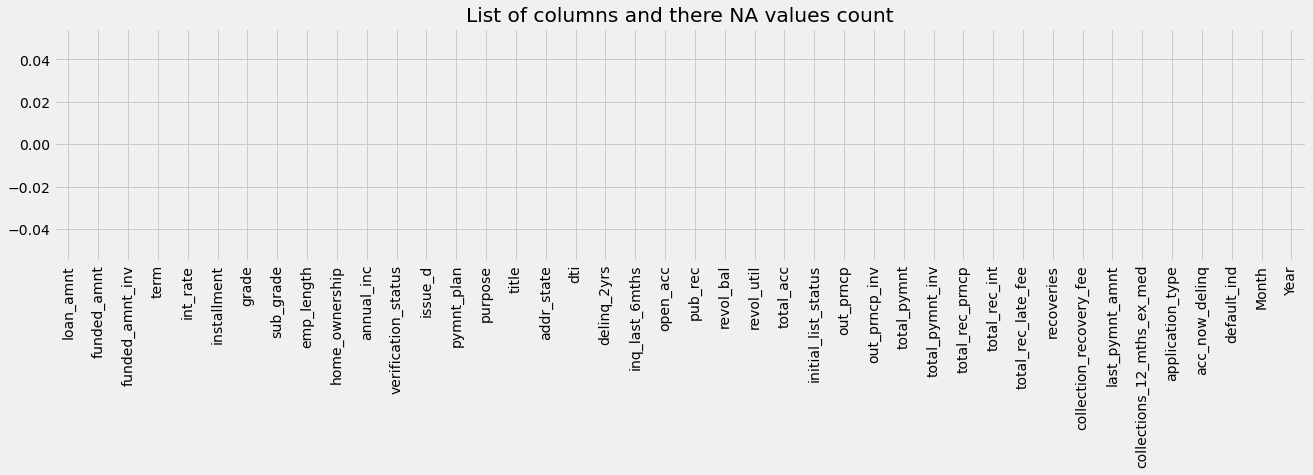

In [49]:
 missing_value_visualization(new_df)

## now there is no missing value in our Data Set

In [50]:
new_df['emp_length'].value_counts()

10.0    250108
2.0      66111
0.5      58937
3.0      58682
1.0      48017
5.0      45547
4.0      43776
8.0      37603
7.0      37273
6.0      34888
9.0      29598
Name: emp_length, dtype: int64

##  Exploratory Data Analysis:

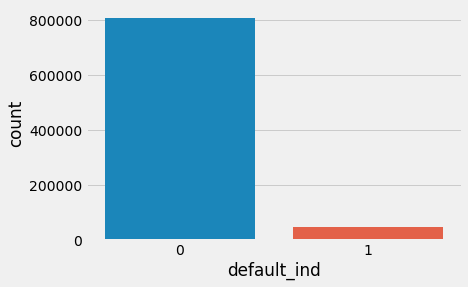

In [51]:
sns.countplot(df['default_ind'])

In [52]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 710540 entries, 4 to 855968
Data columns (total 42 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   loan_amnt                   710540 non-null  float64       
 1   funded_amnt                 710540 non-null  float64       
 2   funded_amnt_inv             710540 non-null  float64       
 3   term                        710540 non-null  object        
 4   int_rate                    710540 non-null  float64       
 5   installment                 710540 non-null  float64       
 6   grade                       710540 non-null  object        
 7   sub_grade                   710540 non-null  object        
 8   emp_length                  710540 non-null  float64       
 9   home_ownership              710540 non-null  object        
 10  annual_inc                  710540 non-null  float64       
 11  verification_status         710540 non-

In [53]:
new_df.shape

(710540, 42)

In [54]:
new_df['initial_list_status'].value_counts()

w    376416
f    334124
Name: initial_list_status, dtype: int64

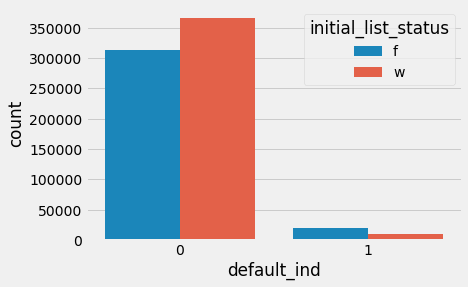

In [55]:
sns.countplot(x='default_ind',hue='initial_list_status',data=new_df)

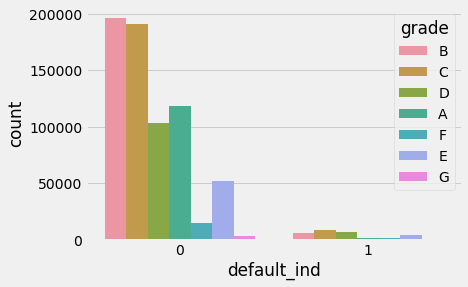

In [56]:
sns.countplot(x='default_ind',hue='grade',data=new_df)

Text(0.5, 1.0, 'Interest Rate on the loan')

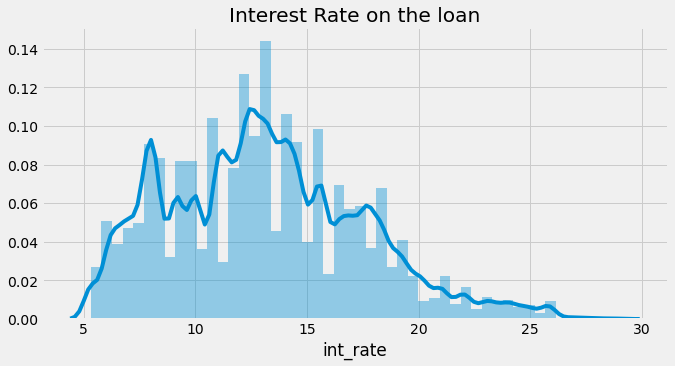

In [57]:
plt.figure(figsize=(10,5))
sns.distplot(new_df['int_rate'])
plt.title("Interest Rate on the loan")


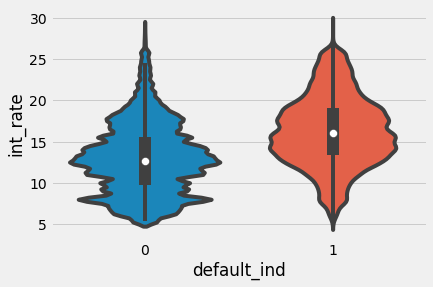

In [58]:
sns.violinplot('default_ind','int_rate',data=new_df,bw='scott')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022D2E562C08>,
      dtype=object)

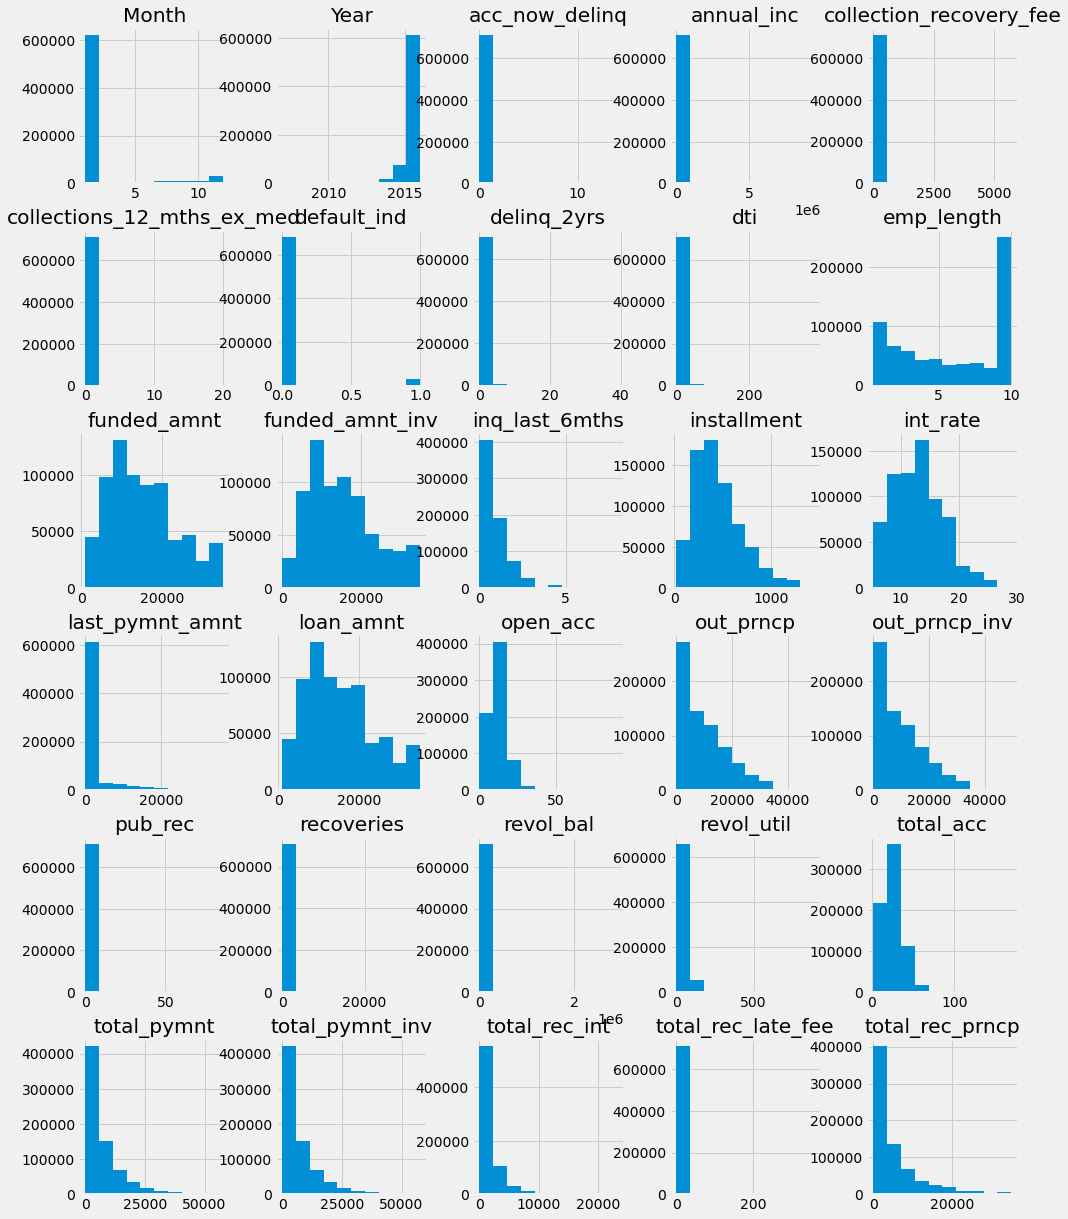

In [59]:
new_df.hist(figsize=(15,20))

In [60]:
new_df.dtypes

loan_amnt                            float64
funded_amnt                          float64
funded_amnt_inv                      float64
term                                  object
int_rate                             float64
installment                          float64
grade                                 object
sub_grade                             object
emp_length                           float64
home_ownership                        object
annual_inc                           float64
verification_status                   object
issue_d                       datetime64[ns]
pymnt_plan                            object
purpose                               object
title                                 object
addr_state                            object
dti                                  float64
delinq_2yrs                          float64
inq_last_6mths                       float64
open_acc                             float64
pub_rec                              float64
revol_bal 

In [61]:
new_df.shape

(710540, 42)

In [62]:
new_df['verification_status'].value_counts()

Source Verified    286708
Not Verified       215292
Verified           208540
Name: verification_status, dtype: int64

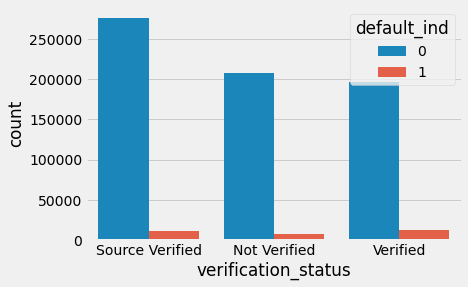

In [63]:
sns.countplot('verification_status',hue='default_ind', data=new_df)

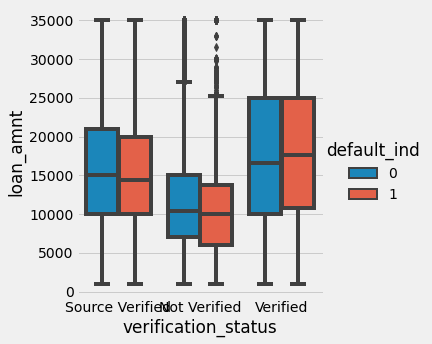

In [64]:
sns.catplot(x='verification_status',y='loan_amnt',data=new_df,hue='default_ind',kind='box')

Text(0.5, 1.0, 'loan Applied by the Custome')

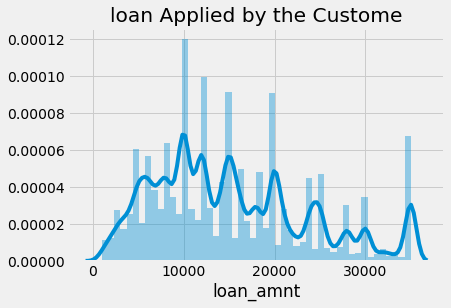

In [65]:
sns.distplot(new_df['loan_amnt'])
plt.title("loan Applied by the Custome")

Text(0.5, 1.0, 'amount funded by the lender')

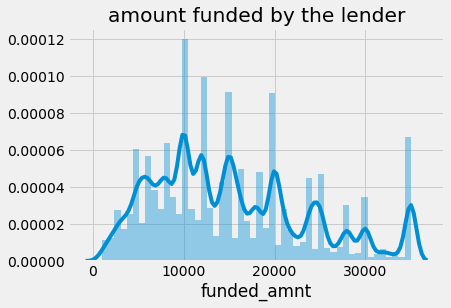

In [66]:
sns.distplot(new_df['funded_amnt'])
plt.title("amount funded by the lender")

In [67]:
new_df['funded_amnt'].value_counts()

10000.0    49036
12000.0    41144
20000.0    39105
15000.0    38936
35000.0    31653
           ...  
34175.0        3
32925.0        3
1225.0         3
32050.0        2
34525.0        2
Name: funded_amnt, Length: 1361, dtype: int64

In [68]:
new_df['purpose'].value_counts()

debt_consolidation    430154
credit_card           167019
home_improvement       39594
other                  31698
major_purchase         11921
small_business          6985
medical                 6406
car                     5535
moving                  3821
vacation                3541
house                   2373
wedding                 1131
renewable_energy         350
educational               12
Name: purpose, dtype: int64

Text(0, 0.5, 'density')

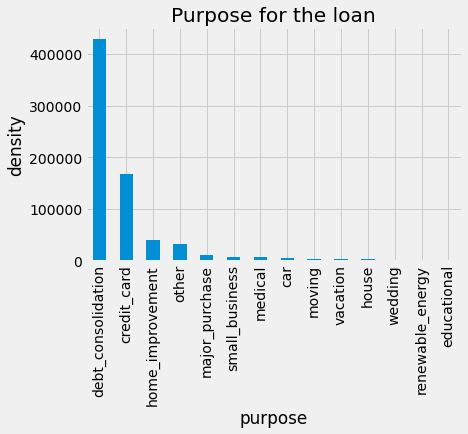

In [69]:
new_df['purpose'].value_counts(ascending=False).plot.bar()
plt.title("Purpose for the loan")
plt.xlabel("purpose")
plt.ylabel("density")

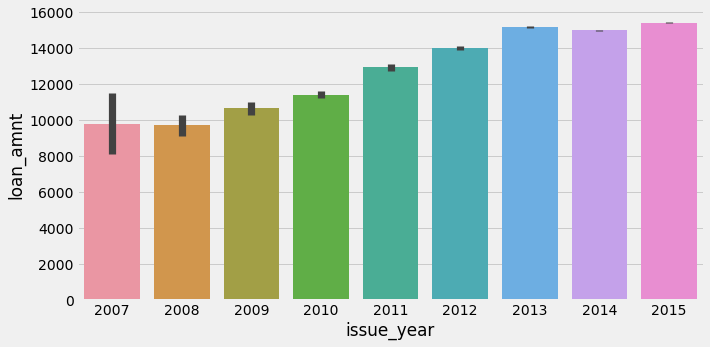

In [70]:
plt.figure(figsize=(10,5))
new_df['issue_year'] = new_df['issue_d'].dt.year
sns.barplot(x='issue_year',y='loan_amnt',data=new_df)

In [71]:
new_df['home_ownership'].value_counts()

MORTGAGE    358543
RENT        283916
OWN          67998
OTHER           54
NONE            26
ANY              3
Name: home_ownership, dtype: int64

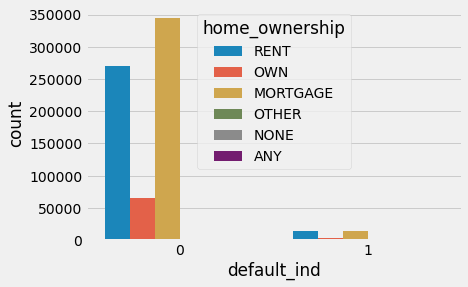

In [72]:
sns.countplot(x='default_ind',hue='home_ownership',data=new_df)

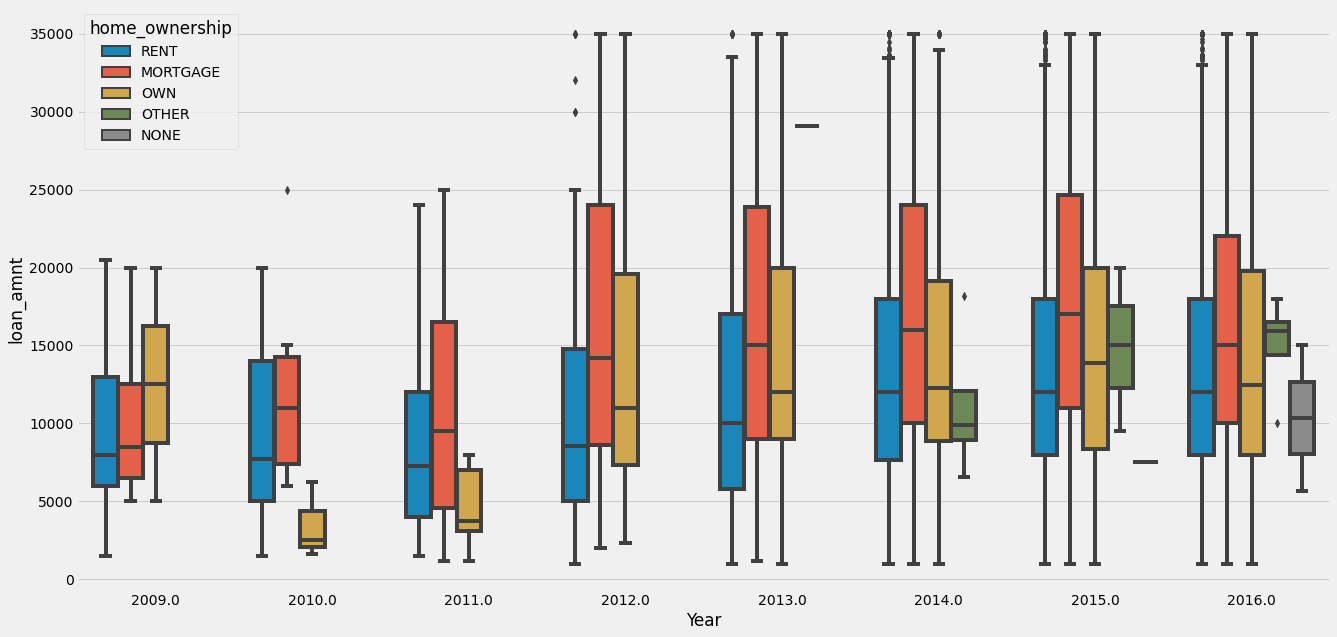

In [73]:
plt.figure(figsize=(20,10))
defaulter = new_df.loc[new_df['default_ind']==1]
sns.boxplot(data=defaulter,x='Year',y='loan_amnt',hue='home_ownership')

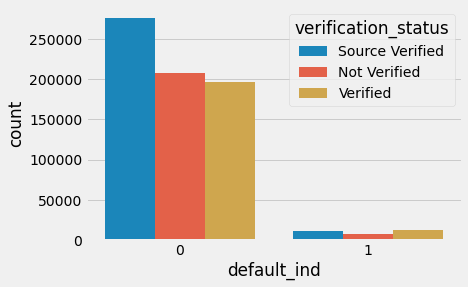

In [74]:
sns.countplot('default_ind',hue='verification_status',data=new_df)

In [75]:
labelling_df = new_df.copy()

In [76]:
labelling_df.shape

(710540, 43)

In [77]:
labelling_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 710540 entries, 4 to 855968
Data columns (total 43 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   loan_amnt                   710540 non-null  float64       
 1   funded_amnt                 710540 non-null  float64       
 2   funded_amnt_inv             710540 non-null  float64       
 3   term                        710540 non-null  object        
 4   int_rate                    710540 non-null  float64       
 5   installment                 710540 non-null  float64       
 6   grade                       710540 non-null  object        
 7   sub_grade                   710540 non-null  object        
 8   emp_length                  710540 non-null  float64       
 9   home_ownership              710540 non-null  object        
 10  annual_inc                  710540 non-null  float64       
 11  verification_status         710540 non-

In [78]:
from sklearn import preprocessing

In [79]:
x1  = preprocessing.LabelEncoder()
x1.fit(new_df['term'])
new_df['term']= x1.transform(new_df['term'])


In [80]:
new_df['term'].unique()

array([1, 0])

In [81]:
x1 = preprocessing.LabelEncoder()
x1.fit(new_df['grade'])

new_df['grade'] = x1.transform(new_df['grade'])
new_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,default_ind,Month,Year,issue_year
4,3000.0,3000.0,3000.0,1,12.69,67.79,1,B5,1.0,RENT,...,0.0,0.0000,67.79,0.0,INDIVIDUAL,0.0,0,1.0,2016.0,2011
6,7000.0,7000.0,7000.0,1,15.96,170.08,2,C5,8.0,RENT,...,0.0,0.0000,170.08,0.0,INDIVIDUAL,0.0,0,1.0,2016.0,2011
11,12000.0,12000.0,12000.0,0,12.69,402.54,1,B5,10.0,OWN,...,0.0,0.0000,6315.30,0.0,INDIVIDUAL,0.0,0,8.0,2013.0,2011
12,9000.0,9000.0,9000.0,0,13.49,305.38,2,C1,0.5,RENT,...,444.3,4.1600,305.38,0.0,INDIVIDUAL,0.0,1,11.0,2012.0,2011
14,10000.0,10000.0,10000.0,0,10.65,325.74,1,B2,3.0,RENT,...,645.1,6.3145,325.74,0.0,INDIVIDUAL,0.0,1,3.0,2014.0,2011


In [82]:
x1 = preprocessing.LabelEncoder()
x1.fit(new_df['sub_grade'])

new_df['sub_grade'] = x1.transform(new_df['sub_grade'])
new_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,default_ind,Month,Year,issue_year
4,3000.0,3000.0,3000.0,1,12.69,67.79,1,9,1.0,RENT,...,0.0,0.0000,67.79,0.0,INDIVIDUAL,0.0,0,1.0,2016.0,2011
6,7000.0,7000.0,7000.0,1,15.96,170.08,2,14,8.0,RENT,...,0.0,0.0000,170.08,0.0,INDIVIDUAL,0.0,0,1.0,2016.0,2011
11,12000.0,12000.0,12000.0,0,12.69,402.54,1,9,10.0,OWN,...,0.0,0.0000,6315.30,0.0,INDIVIDUAL,0.0,0,8.0,2013.0,2011
12,9000.0,9000.0,9000.0,0,13.49,305.38,2,10,0.5,RENT,...,444.3,4.1600,305.38,0.0,INDIVIDUAL,0.0,1,11.0,2012.0,2011
14,10000.0,10000.0,10000.0,0,10.65,325.74,1,6,3.0,RENT,...,645.1,6.3145,325.74,0.0,INDIVIDUAL,0.0,1,3.0,2014.0,2011


In [83]:
new_df['sub_grade'].unique()

array([ 9, 14, 10,  6, 15, 13,  7, 11, 16,  2,  3,  4,  8,  5,  0, 12, 18,
       27, 23, 17, 28,  1, 19, 24, 20, 33, 21, 22, 25, 29, 26, 34, 31, 30,
       32])

In [84]:
x1 = preprocessing.LabelEncoder()
x1.fit(new_df['home_ownership'])

new_df['home_ownership'] = x1.transform(new_df['home_ownership'])
new_df['home_ownership'].unique()

array([5, 4, 1, 3, 2, 0])

In [85]:
x1 = preprocessing.LabelEncoder()
x1.fit(new_df['verification_status'])

new_df['verification_status'] = x1.transform(new_df['verification_status'])
new_df['verification_status'].unique()

array([1, 0, 2])

In [86]:
x1 = preprocessing.LabelEncoder()
x1.fit(new_df['pymnt_plan'])

new_df['pymnt_plan'] = x1.transform(new_df['pymnt_plan'])
new_df['pymnt_plan'].unique()

array([0, 1])

In [87]:
x1 = preprocessing.LabelEncoder()
x1.fit(new_df['purpose'])

new_df['purpose'] = x1.transform(new_df['purpose'])
new_df['purpose'].unique()

array([ 9,  2,  4,  7,  1, 11,  0,  6,  5, 12,  8, 13, 10,  3])

In [88]:
x1 = preprocessing.LabelEncoder()
x1.fit(new_df['title'])

new_df['title'] = x1.transform(new_df['title'])
new_df['title'].unique()

array([108,  83,  15, 149, 101,  53,  74,  90,  25,  51, 127, 100,  21,
       140, 118,  11,  34,  99,  36, 115,  73,  80,  31,  29,   0,  88,
        60,  13, 157,  20,  17,  10,  62,  67,   1,   3,  52,  23,  24,
       159,  55, 128, 141, 152,  27, 135,  18, 131,  35,  28, 126, 142,
        75, 138,  61,   5, 162,   2, 117,   7, 158, 109, 110,  68,  76,
        16,  40, 161, 132,   9, 133, 106,  56, 113, 153, 144,  81,  93,
        84, 143, 114,  94,  47, 160, 119,  87, 134,  14, 116, 137,  57,
        37, 105,  77,  98, 122,  22, 120,  70, 147,  69, 155,  97, 104,
        26, 154,  38, 156, 124,  65,  33, 150, 145, 139,  85, 107,  39,
       112,  95, 130,  89,  46,  91,  64,  48, 148, 125, 121, 151,  82,
       111,  30,  58,  71,  45, 129,  59, 103, 163, 146, 102,   4,  50,
        19,  66,  43,  41,   6,  78,   8,  32,  63,  49,  54,  44,  86,
       136, 123,  79,  42,  72,  92,  12,  96])

In [89]:
x1 = preprocessing.LabelEncoder()
x1.fit(new_df['addr_state'])

new_df['addr_state'] = x1.transform(new_df['addr_state'])
new_df['addr_state'].unique()

array([37, 27,  4, 45, 24, 44, 43, 34, 38,  9, 31, 35,  3, 40, 39, 19,  6,
       14, 48, 10,  1, 23,  5, 16, 18, 33, 49, 47, 46, 41, 30,  2, 20, 32,
       11, 50, 17, 36,  7,  0, 22, 26,  8, 25, 42, 13, 29, 21, 15, 12, 28])

In [90]:
x1 = preprocessing.LabelEncoder()
x1.fit(new_df['initial_list_status'])

new_df['initial_list_status'] = x1.transform(new_df['initial_list_status'])
new_df['initial_list_status'].unique()

array([0, 1])

In [91]:
x1 = preprocessing.LabelEncoder()
x1.fit(new_df['application_type'])

new_df['application_type'] = x1.transform(new_df['application_type'])
new_df['application_type'].unique()

array([0, 1])

In [92]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 710540 entries, 4 to 855968
Data columns (total 43 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   loan_amnt                   710540 non-null  float64       
 1   funded_amnt                 710540 non-null  float64       
 2   funded_amnt_inv             710540 non-null  float64       
 3   term                        710540 non-null  int32         
 4   int_rate                    710540 non-null  float64       
 5   installment                 710540 non-null  float64       
 6   grade                       710540 non-null  int32         
 7   sub_grade                   710540 non-null  int32         
 8   emp_length                  710540 non-null  float64       
 9   home_ownership              710540 non-null  int32         
 10  annual_inc                  710540 non-null  float64       
 11  verification_status         710540 non-

# splitting of the data into train and test data set

In [93]:
train = new_df[new_df['issue_d'] < '2015-6-01']
test = new_df[new_df['issue_d'] >= '2015-6-01']

In [94]:
print(train.shape,test.shape)

(468507, 43) (242033, 43)


In [95]:
x_train=train.drop(['default_ind','title','issue_d'],axis=1)
y_train=train['default_ind']
x_test=test.drop(['default_ind','title','issue_d'],axis=1)
y_test=test['default_ind']

In [96]:
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import average_precision_score,roc_auc_score
from sklearn.metrics import f1_score,roc_curve,recall_score
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score

## LogisticRegression

In [97]:
log_model = LogisticRegression()

In [98]:
from datetime import datetime
start = datetime.now()
log_model.fit(x_train,y_train)
stop = datetime.now()

C:\Users\abhin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [99]:
exe_time_lr = stop-start
exe_time_lr

datetime.timedelta(seconds=7, microseconds=407572)

In [100]:
log_prediction = log_model.predict(x_train)
accuracy_score_train_lr = accuracy_score(y_train,log_prediction)
print('Accuracy score on train set:-',accuracy_score_train_lr)

Accuracy score on train set:- 0.9967044249072052


In [101]:
# Logistic regression auc_roc score
auc_log_train =  roc_auc_score(y_train,log_prediction)
print("Logistic Regression auc_roc_score=", auc_log_train)

Logistic Regression auc_roc_score= 0.975102275654187


In [102]:
confusion_matrix(y_train,log_prediction)

array([[437836,     19],
       [  1525,  29127]], dtype=int64)

## Area under the curve

In [103]:
from sklearn import metrics

In [104]:
fpr, tpr, thresholds = metrics.roc_curve(y_train,log_prediction)
print("AUC on train using Logistic Regression :",metrics.auc(fpr, tpr))

AUC on train using Logistic Regression : 0.975102275654187


## Average Precision Recall Score

In [105]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_train, log_prediction)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.95


## Recall Score

In [106]:
from sklearn.metrics import recall_score

In [107]:
recal_score = recall_score(y_train, log_prediction)

In [108]:
print("Recall score on the train set:-",recal_score)

Recall score on the train set:- 0.9502479446691896


### classification report

In [109]:
print(classification_report(y_train,log_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    437855
           1       1.00      0.95      0.97     30652

    accuracy                           1.00    468507
   macro avg       1.00      0.98      0.99    468507
weighted avg       1.00      1.00      1.00    468507



In [110]:
#model on test using all the independent variable in df
log_test_pred = log_model.predict(x_test)
accuracy_score_test_lr = accuracy_score(y_test,log_test_pred)
print("accuracy score on test:-",accuracy_score_test_lr)

accuracy score on test:- 0.9996198865443968


In [115]:
# Logistic regression auc_roc score
auc_log_test =  metrics.auc(fpr, tpr)
print("Logistic Regression auc_roc_score=", auc_log_test)

Logistic Regression auc_roc_score= 0.898884382090097


In [112]:
confusion_matrix(y_test,log_test_pred)

array([[241712,     34],
       [    58,    229]], dtype=int64)

In [114]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,log_test_pred)
print("AUC on train using Logistic Regression :",metrics.auc(fpr, tpr))

AUC on train using Logistic Regression : 0.898884382090097


In [116]:
average_precision = average_precision_score(y_test, log_test_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.69


In [117]:
recal_score = recall_score(y_test, log_test_pred)
print("Recall score on the train set:-",recal_score)

Recall score on the train set:- 0.7979094076655052


In [118]:
print(classification_report(y_test,log_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    241746
           1       0.87      0.80      0.83       287

    accuracy                           1.00    242033
   macro avg       0.94      0.90      0.92    242033
weighted avg       1.00      1.00      1.00    242033



auc_score for Logistic Regression(train):  0.9864407902908656


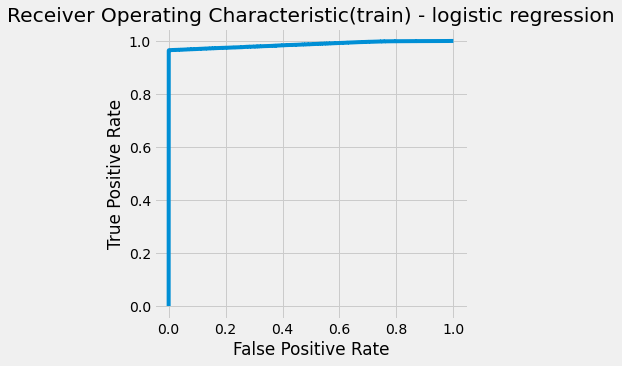

auc_score for Logistic Regression(test):  0.9051769601468711


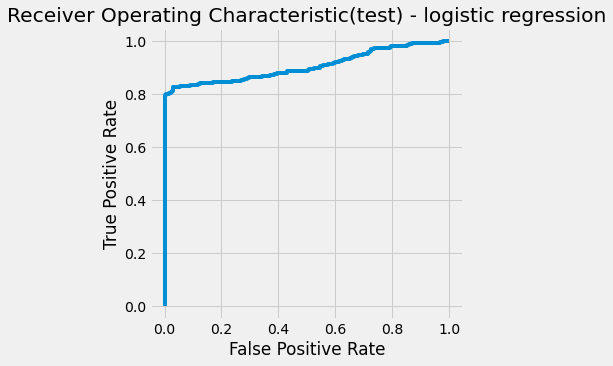

In [119]:
lr_prob=log_model.predict_proba(x_train)
lr_prob=lr_prob[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_train, lr_prob)
print('auc_score for Logistic Regression(train): ', roc_auc_score(y_train, lr_prob))
# Plot ROC curves
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic(train) - logistic regression')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
lr_prob_test=log_model.predict_proba(x_test)
lr_prob_test=lr_prob_test[:,1]
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, lr_prob_test)
print('auc_score for Logistic Regression(test): ', roc_auc_score(y_test, lr_prob_test))
# Plot ROC curves
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic(test) - logistic regression')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# XGBOOST ALGORITHM

In [120]:
import xgboost as xgb

In [121]:
xgboost = xgb.XGBClassifier(max_depth=3,n_estimators=300,learning_rate=0.05)

In [122]:
start = datetime.now()
xgboost.fit(x_train,y_train)
stop = datetime.now()

In [123]:
exe_time_xgboost = stop-start
exe_time_xgboost

datetime.timedelta(seconds=253, microseconds=674922)

In [124]:
#XGBoost model on the train set
XGB_prediction = xgboost.predict(x_train)
XGB_score_train= accuracy_score(y_train,XGB_prediction)
print('accuracy score while using XGBoost ',XGB_score_train)

accuracy score while using XGBoost  0.9972487070630748


In [125]:
# XGBOOST auc_roc score
auc_xgb_train =  roc_auc_score(y_train,XGB_prediction)
print("Logistic Regression auc_roc_score=", auc_xgb_train)

Logistic Regression auc_roc_score= 0.9791253417541594


In [126]:
confusion_matrix(y_train, XGB_prediction)

array([[437845,     10],
       [  1279,  29373]], dtype=int64)

In [127]:
fpr, tpr, thresholds = metrics.roc_curve(y_train,XGB_prediction)
print("AUC on train using XGBoost :",metrics.auc(fpr, tpr))

AUC on train using XGBoost : 0.9791253417541594


In [128]:
average_precision = average_precision_score(y_train, XGB_prediction)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.96


In [129]:
print('recall_score on train set :',recall_score(y_train, XGB_prediction))

recall_score on train set : 0.9582735221192744


In [130]:
print('F1_sccore on train set :',f1_score(y_train, XGB_prediction))

F1_sccore on train set : 0.9785291913050721


In [131]:
print('classification Report on  train using XGBoost :')
print(classification_report(y_train,XGB_prediction))

classification Report on  train using XGBoost :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    437855
           1       1.00      0.96      0.98     30652

    accuracy                           1.00    468507
   macro avg       1.00      0.98      0.99    468507
weighted avg       1.00      1.00      1.00    468507



In [132]:
#XGBoost model on the test
XGB_prediction = xgboost.predict(x_test)
XGB_score_test= accuracy_score(y_test,XGB_prediction)
print('accuracy score on test using XGBoost :',XGB_score_test)

accuracy score on test using XGBoost : 0.5469130242570228


In [133]:
# XGBOOST auc_roc score
auc_xgb_test =  roc_auc_score(y_test,XGB_prediction)
print("xgb Regression auc_roc_score=", auc_xgb_test)

xgb Regression auc_roc_score= 0.7627470085441997


In [134]:
confusion_matrix(y_test, XGB_prediction)

array([[132090, 109656],
       [     6,    281]], dtype=int64)

In [135]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,XGB_prediction)
print("AUC on test using XGBoost :",metrics.auc(fpr, tpr))

AUC on test using XGBoost : 0.7627470085441997


In [136]:
average_precision = average_precision_score(y_test, XGB_prediction)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.00


In [137]:
print('recall_score on test set :',recall_score(y_test, XGB_prediction))

recall_score on test set : 0.9790940766550522


In [138]:
print('F1_sccore on test set :',f1_score(y_test, XGB_prediction))

F1_sccore on test set : 0.005098708085353462


In [139]:
print('classification Report on  test using XGBoost :\n',classification_report(y_test,XGB_prediction))


classification Report on  test using XGBoost :
               precision    recall  f1-score   support

           0       1.00      0.55      0.71    241746
           1       0.00      0.98      0.01       287

    accuracy                           0.55    242033
   macro avg       0.50      0.76      0.36    242033
weighted avg       1.00      0.55      0.71    242033



auc_score for Xgboost: (train):  0.9960566966236988


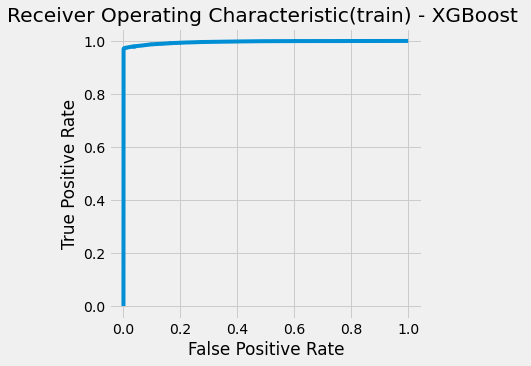

auc_score for Xgboost(test):  0.8919261977130314


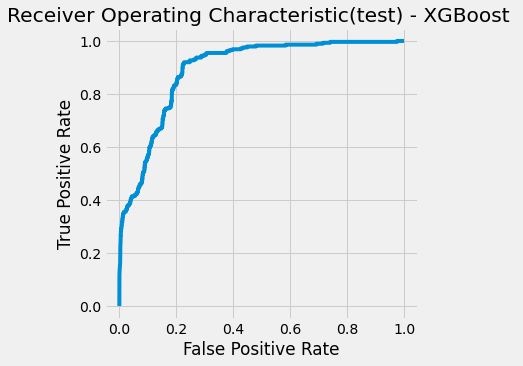

In [140]:
xg_prob=xgboost.predict_proba(x_train)
xg_prob=xg_prob[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_train, xg_prob)
print('auc_score for Xgboost: (train): ', roc_auc_score(y_train, xg_prob))
# Plot ROC curves
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic(train) - XGBoost ')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
xg_prob_test=xgboost.predict_proba(x_test)
xg_prob_test=xg_prob_test[:,1]
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, xg_prob_test)
print('auc_score for Xgboost(test): ', roc_auc_score(y_test, xg_prob_test))
# Plot ROC curves
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic(test) - XGBoost ')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Random Forest Classifier

In [141]:
rfc2=RandomForestClassifier()
start=datetime.now()
rfc2.fit(x_train,y_train)
stop = datetime.now()

In [142]:
exe_time_random = stop - start
exe_time_random

datetime.timedelta(seconds=321, microseconds=690113)

In [143]:
#model on train using all the independent values in df
rfc_prediction = rfc2.predict(x_train)
rfc_score_train= accuracy_score(y_train,rfc_prediction)
print('accuracy Score on train using RandomForest :',rfc_score_train)

accuracy Score on train using RandomForest : 0.9999935966805191


In [144]:
# Random auc_roc score
auc_random_train =  roc_auc_score(y_train,rfc_prediction)
print("Random forest classifier auc_roc_score=", auc_random_train)

Random forest classifier auc_roc_score= 0.9999510635521336


In [145]:
confusion_matrix(y_train, rfc_prediction)

array([[437855,      0],
       [     3,  30649]], dtype=int64)

In [146]:
fpr, tpr, thresholds = metrics.roc_curve(y_train,rfc_prediction)
print("AUC on train using RandomForest :",metrics.auc(fpr, tpr))

AUC on train using RandomForest : 0.9999510635521336


In [147]:
average_precision = average_precision_score(y_train, rfc_prediction)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 1.00


In [148]:
print('recall_score on train set :',recall_score(y_train, rfc_prediction))

recall_score on train set : 0.9999021271042673


In [149]:
print('F1_sccore on train set :',f1_score(y_train, rfc_prediction))

F1_sccore on train set : 0.9999510611572405


In [150]:
print('classification Report on  train using RandomForest :')
print(classification_report(y_train,rfc_prediction))

classification Report on  train using RandomForest :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    437855
           1       1.00      1.00      1.00     30652

    accuracy                           1.00    468507
   macro avg       1.00      1.00      1.00    468507
weighted avg       1.00      1.00      1.00    468507



In [151]:
#model on test using all the indpendent values in df
rfc_prediction = rfc2.predict(x_test)
rfc_score_test= accuracy_score(y_test,rfc_prediction)
print('accuracy score on test using RandomForest ',rfc_score_test)

accuracy score on test using RandomForest  0.36535100585457353


In [152]:
# Random auc_roc score
auc_random_test =  roc_auc_score(y_test,rfc_prediction)
print("Random forest classifier auc_roc_score=", auc_random_test)

Random forest classifier auc_roc_score= 0.6805586844094809


In [153]:
confusion_matrix(y_test, rfc_prediction)

array([[ 88141, 153605],
       [     1,    286]], dtype=int64)

In [154]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,rfc_prediction)
print("AUC on test using RandomForest :",metrics.auc(fpr, tpr))

AUC on test using RandomForest : 0.6805586844094809


In [155]:
average_precision = average_precision_score(y_test, rfc_prediction)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.00


In [156]:
print('recall_score on test set :',recall_score(y_test, rfc_prediction))

recall_score on test set : 0.9965156794425087


In [157]:
print('F1_sccore on test set :',f1_score(y_test, rfc_prediction))

F1_sccore on test set : 0.003709997535316323


In [158]:
print('classification Report on  test using RandomForest :')
print(classification_report(y_test,rfc_prediction))

classification Report on  test using RandomForest :
              precision    recall  f1-score   support

           0       1.00      0.36      0.53    241746
           1       0.00      1.00      0.00       287

    accuracy                           0.37    242033
   macro avg       0.50      0.68      0.27    242033
weighted avg       1.00      0.37      0.53    242033



auc_score for Random Forest : (train):  1.0


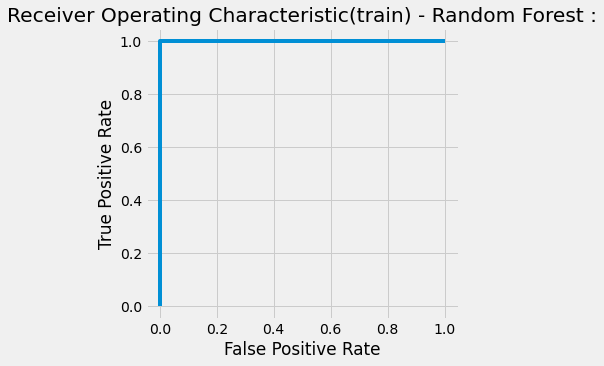

auc_score for Random forest (test):  0.9459161300147697


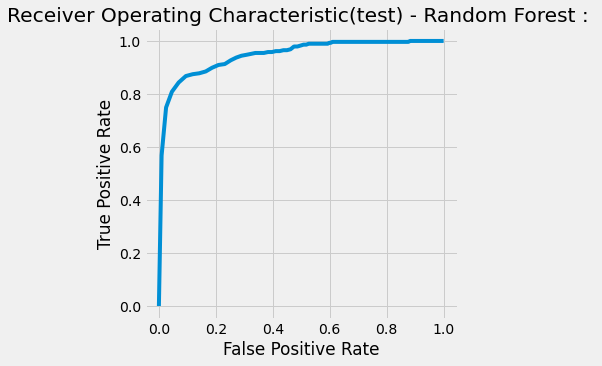

In [159]:
rf_prob=rfc2.predict_proba(x_train)
rf_prob=rf_prob[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_train, rf_prob)
print('auc_score for Random Forest : (train): ', roc_auc_score(y_train, rf_prob))
# Plot ROC curves
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic(train) - Random Forest :')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
rf_prob_test=rfc2.predict_proba(x_test)
rf_prob_test=rf_prob_test[:,1]
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, rf_prob_test)
print('auc_score for Random forest (test): ', roc_auc_score(y_test, rf_prob_test))
# Plot ROC curves
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic(test) - Random Forest : ')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Decision Tree Classifier

In [161]:
from sklearn.tree import DecisionTreeClassifier

In [162]:
decision_tree=DecisionTreeClassifier()

In [163]:
start = datetime.now()
decision_tree.fit(x_train,y_train)
stop = datetime.now()

In [164]:
exec_decision_time = stop -start
exec_decision_time

datetime.timedelta(seconds=37, microseconds=868273)

In [165]:
#model on train using all the independent values in df
dec_prediction = decision_tree.predict(x_train)
dec_score_train= accuracy_score(y_train,dec_prediction)
print('Accuracy score on train using Decision Tree :',dec_score_train)

Accuracy score on train using Decision Tree : 1.0


In [166]:
# decision auc_roc score
auc_decision_train =  roc_auc_score(y_train,dec_prediction)
print("Decision  auc_roc_score=", auc_decision_train)

Decision  auc_roc_score= 1.0


In [167]:
    print(confusion_matrix(y_train, dec_prediction))
    fpr, tpr, thresholds = metrics.roc_curve(y_train,dec_prediction)
    print("AUC on train using DecisionTree :",metrics.auc(fpr, tpr))
    average_precision = average_precision_score(y_train, dec_prediction)
    print('Average precision-recall score: {0:0.2f}'.format(average_precision))
    print('recall_score on train set :',recall_score(y_train, dec_prediction))
    print('F1_sccore on train set :',f1_score(y_train, dec_prediction))
    print('classification report on train using Decision tree ',classification_report(y_train,dec_prediction))

[[437855      0]
 [     0  30652]]
AUC on train using DecisionTree : 1.0
Average precision-recall score: 1.00
recall_score on train set : 1.0
F1_sccore on train set : 1.0
classification report on train using Decision tree                precision    recall  f1-score   support

           0       1.00      1.00      1.00    437855
           1       1.00      1.00      1.00     30652

    accuracy                           1.00    468507
   macro avg       1.00      1.00      1.00    468507
weighted avg       1.00      1.00      1.00    468507



In [168]:
#model on test using all the independent values in df
dec_prediction = decision_tree.predict(x_test)
dec_score_test= accuracy_score(y_test,dec_prediction)
print('Accuracy Score on tree using Decision Tree  :',dec_score_test)

Accuracy Score on tree using Decision Tree  : 0.2631624613172584


In [169]:
# decision auc_roc score
auc_decision_test =  roc_auc_score(y_test,dec_prediction)
print("Decision  auc_roc_score=", auc_decision_test)

Decision  auc_roc_score= 0.6294037532006915


In [170]:
    print(confusion_matrix(y_test, dec_prediction))

[[ 63408 178338]
 [     1    286]]


In [171]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,dec_prediction)
print("AUC on test using DecisionTree :",metrics.auc(fpr, tpr))

AUC on test using DecisionTree : 0.6294037532006915


In [172]:
 average_precision = average_precision_score(y_test, dec_prediction)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Average precision-recall score: 0.00


In [173]:
print('recall_score on test set :',recall_score(y_test, dec_prediction))

recall_score on test set : 0.9965156794425087


In [174]:
print('F1_sccore on test set :',f1_score(y_test, dec_prediction))

F1_sccore on test set : 0.0031971203559311616


In [175]:
print('classification report on test using Decision tree ',classification_report(y_test,dec_prediction))

classification report on test using Decision tree                precision    recall  f1-score   support

           0       1.00      0.26      0.42    241746
           1       0.00      1.00      0.00       287

    accuracy                           0.26    242033
   macro avg       0.50      0.63      0.21    242033
weighted avg       1.00      0.26      0.42    242033



auc_score for decision tree : (train):  1.0


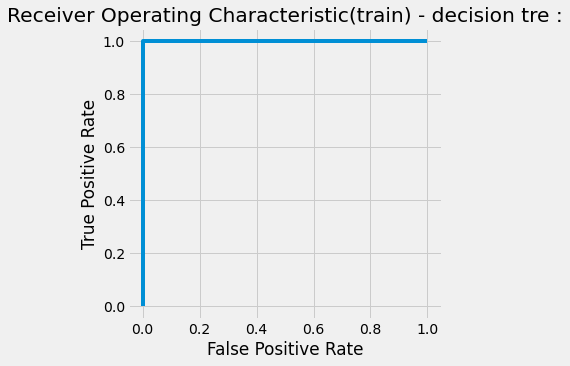

auc_score for decision tree (test):  0.6294037532006915


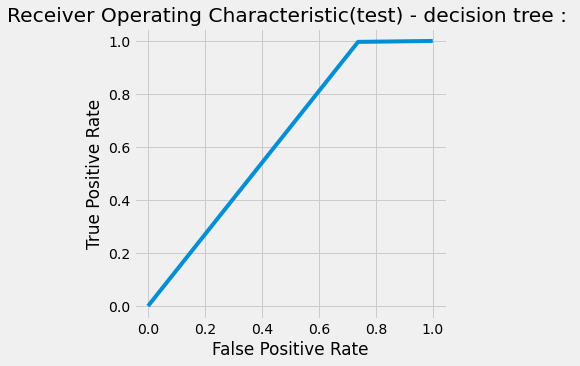

In [176]:
rf_prob=decision_tree.predict_proba(x_train)
rf_prob=rf_prob[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_train, rf_prob)
print('auc_score for decision tree : (train): ', roc_auc_score(y_train, rf_prob))
# Plot ROC curves
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic(train) - decision tre :')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
rf_prob_test=decision_tree.predict_proba(x_test)
rf_prob_test=rf_prob_test[:,1]
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, rf_prob_test)
print('auc_score for decision tree (test): ', roc_auc_score(y_test, rf_prob_test))
# Plot ROC curves
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic(test) - decision tree : ')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [177]:
score_dict = {'accuracy score on train':(accuracy_score_train_lr,XGB_score_train,rfc_score_train,dec_score_train),
                   'accuracy score on test':(accuracy_score_test_lr,XGB_score_test,rfc_score_test,dec_score_test),
                   'auc score on train':(auc_log_train,auc_xgb_train,auc_random_train,auc_decision_train),
                   'auc score on test':(auc_log_test,auc_xgb_test,auc_random_test,auc_decision_test),
                   'execution time':(exe_time_lr,exe_time_xgboost,exe_time_random,exec_decision_time)}

In [178]:
score_df = pd.DataFrame(score_dict) 
score_df.index= ['LogisticRegression','xgboost','RandomForest','DEcision tree'] 
score_df

,accuracy score on train,accuracy score on test,auc score on train,auc score on test,execution time
LogisticRegression,0.996704,0.999620,0.975102,0.898884,00:00:07.407572
xgboost,0.997249,0.546913,0.979125,0.762747,00:04:13.674922
RandomForest,0.999994,0.365351,0.999951,0.680559,00:05:21.690113
DEcision tree,1.000000,0.263162,1.000000,0.629404,00:00:37.868273


Hence based on key finding the conclusion is that Logistic regression model is the best fit model for this dataset to predict the customer reorder ratio

logistic regression model having model accuracy as 99% on train data set and accuracy on test also 99% and AUC_ROC score on train also 97% and AUC_ROC score on test also 87% to predict.